# Import Important libraries for Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(16468, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.ndim

2

In [6]:
df.min()

Unnamed: 0          0.00
AveragePrice        0.49
Total Volume    38750.74
4046              467.72
4225             1783.77
4770                0.00
Total Bags       3311.77
Small Bags       3311.77
Large Bags          0.00
XLarge Bags         0.00
year             2015.00
dtype: float64

In [7]:
df.max()

Unnamed: 0            51.00
AveragePrice           1.68
Total Volume    44655461.51
4046            18933038.04
4225            18956479.74
4770             1381516.11
Total Bags       6736304.04
Small Bags       5893641.72
Large Bags       1121076.47
XLarge Bags       108072.79
year                2016.00
dtype: float64

In [8]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [11]:
df.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [12]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

<AxesSubplot:>

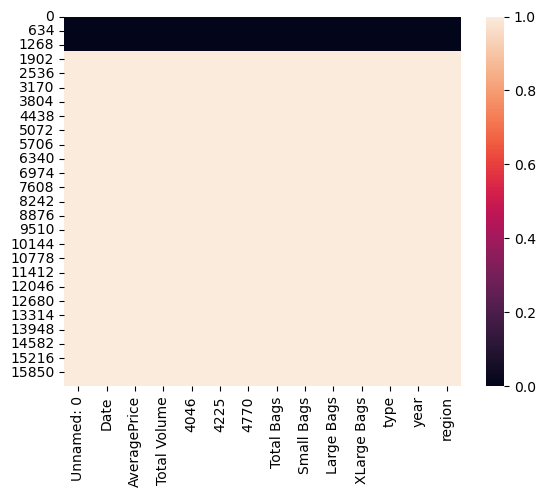

In [13]:
sns.heatmap(df.isnull())

As we can se there are nan values in the dataset, first we will remove the Nan values

In [14]:
df.dropna(inplace=True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


<AxesSubplot:>

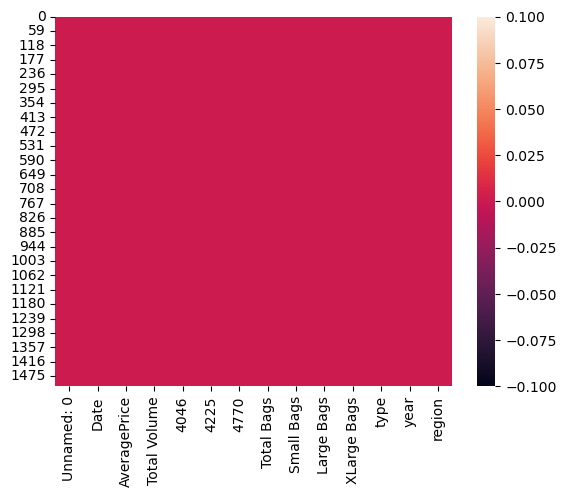

In [15]:
sns.heatmap(df.isnull())

Observation- As we can see that the row number reduced to 1517 from 16468

For Linear Regression its compulsory that all the columns should be in numeric formate or integer type

In [16]:
df.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [17]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [18]:
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

As all the "type" are conventional, we can drop the column "type", as in LinearRegression it will only consider int datatype

In [19]:
df=df.drop(columns = ['type'])

In [20]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte


Observation- Still we have a region column which we cannot drop hence we will use Label encoder here 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df['region']=le.fit_transform(df['region'])

In [24]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


Observation- Now all the data is in numeric formate, we can proceed with feature engineering and preprocessing 

In [25]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000


Observation- Std deviation varies hence there is the possibilities of outliers 
checking the difference between mean and 50%- In XLaregeBags columns there is the possibilities of skewness
Checking the difference in 75% and max-In XLargeBags column there is a possibilities of outliers as the difference is high 

In [26]:
dfcor=df.corr()
dfcor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854,0.012123
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144


Checking the correlation in graphical form for getting more understanding on dataset

<AxesSubplot:>

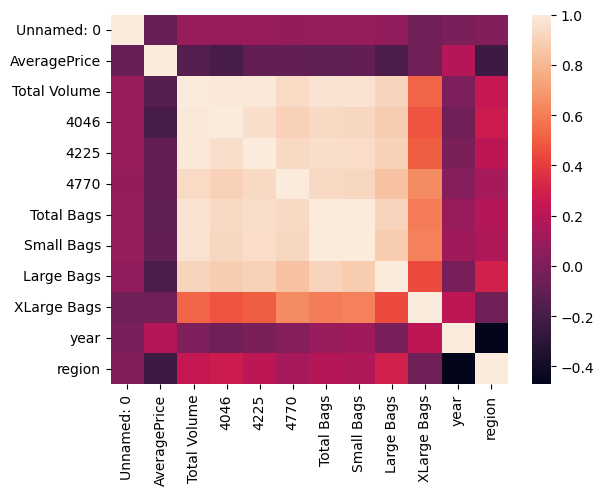

In [27]:
sns.heatmap(dfcor)

Observation- "Total Bags" & "Small Bags" columns are highly correleated.
Also the 4046,4225,4770 also shows more correlation. 
Understanding this correlation more closely with the help of graphical formate

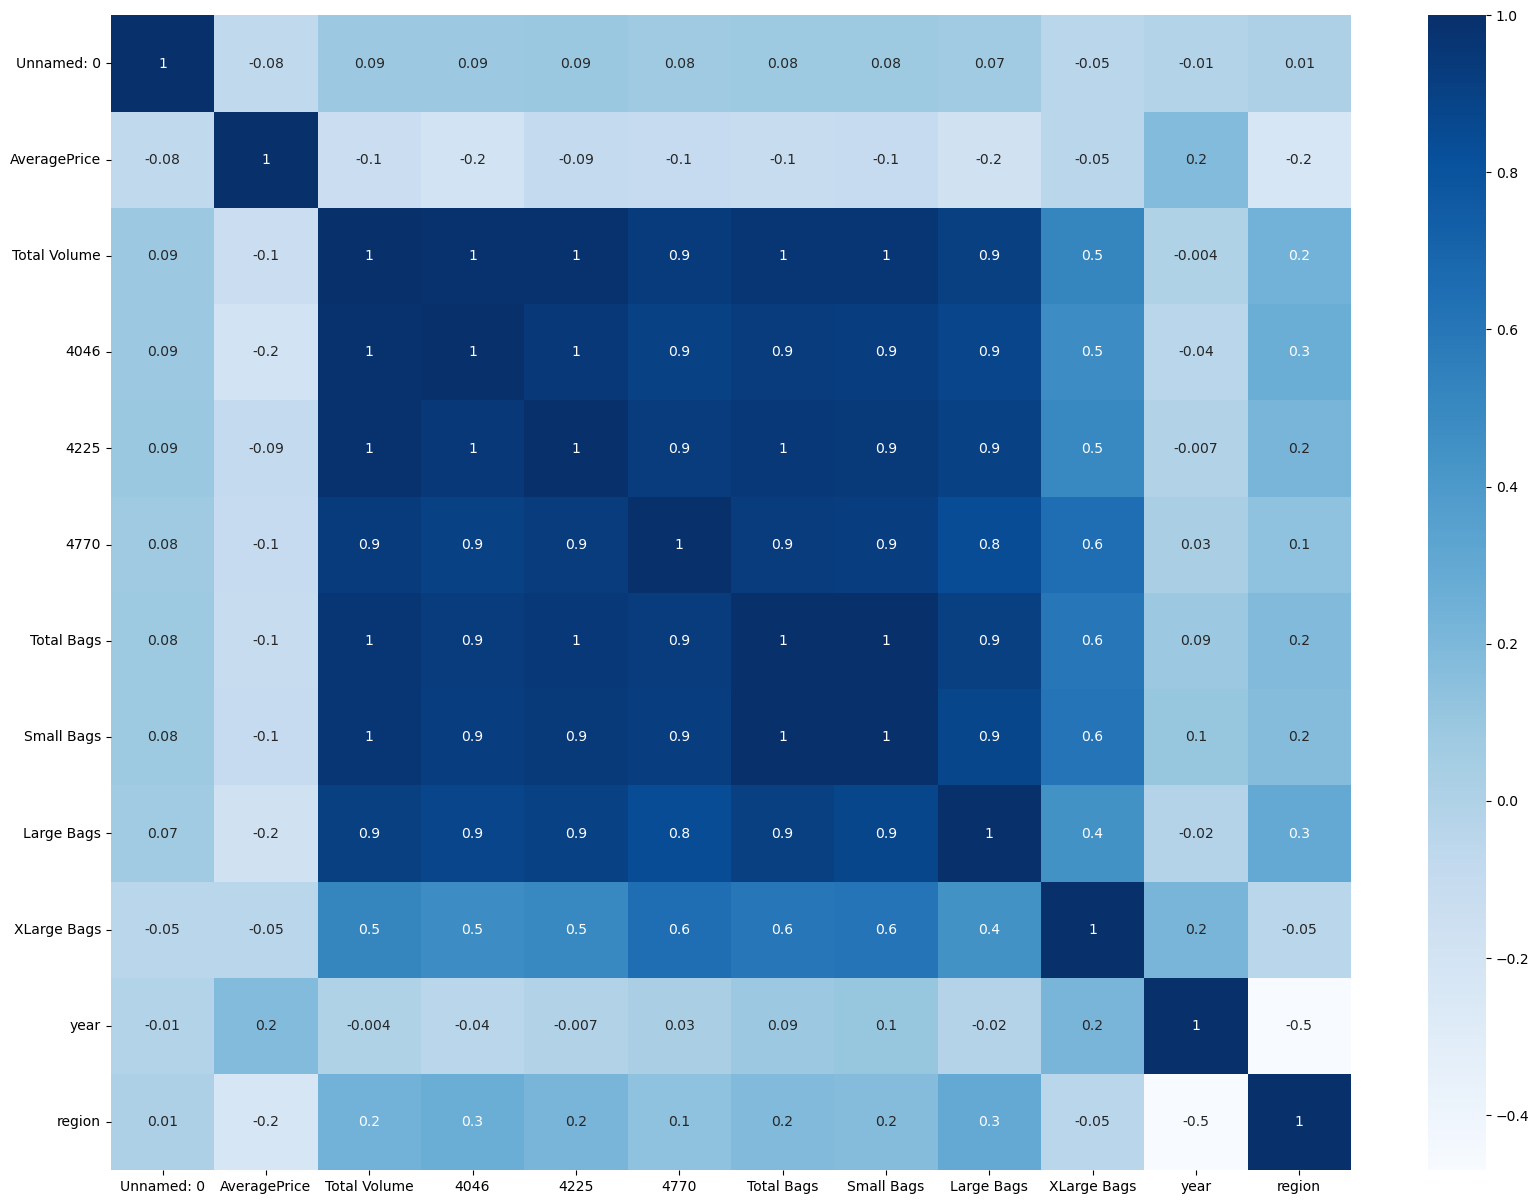

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',fmt=".1g",annot=True)
plt.yticks(rotation=0);
plt.show()

Observation- This is the clear version of correlation of the data. "Region" is negatively correleated with "Year" there is no relation in region and year, Also Avg. Price is not related with region

Still checking the correlation in bar graph form to get more clear picture on the given dataset

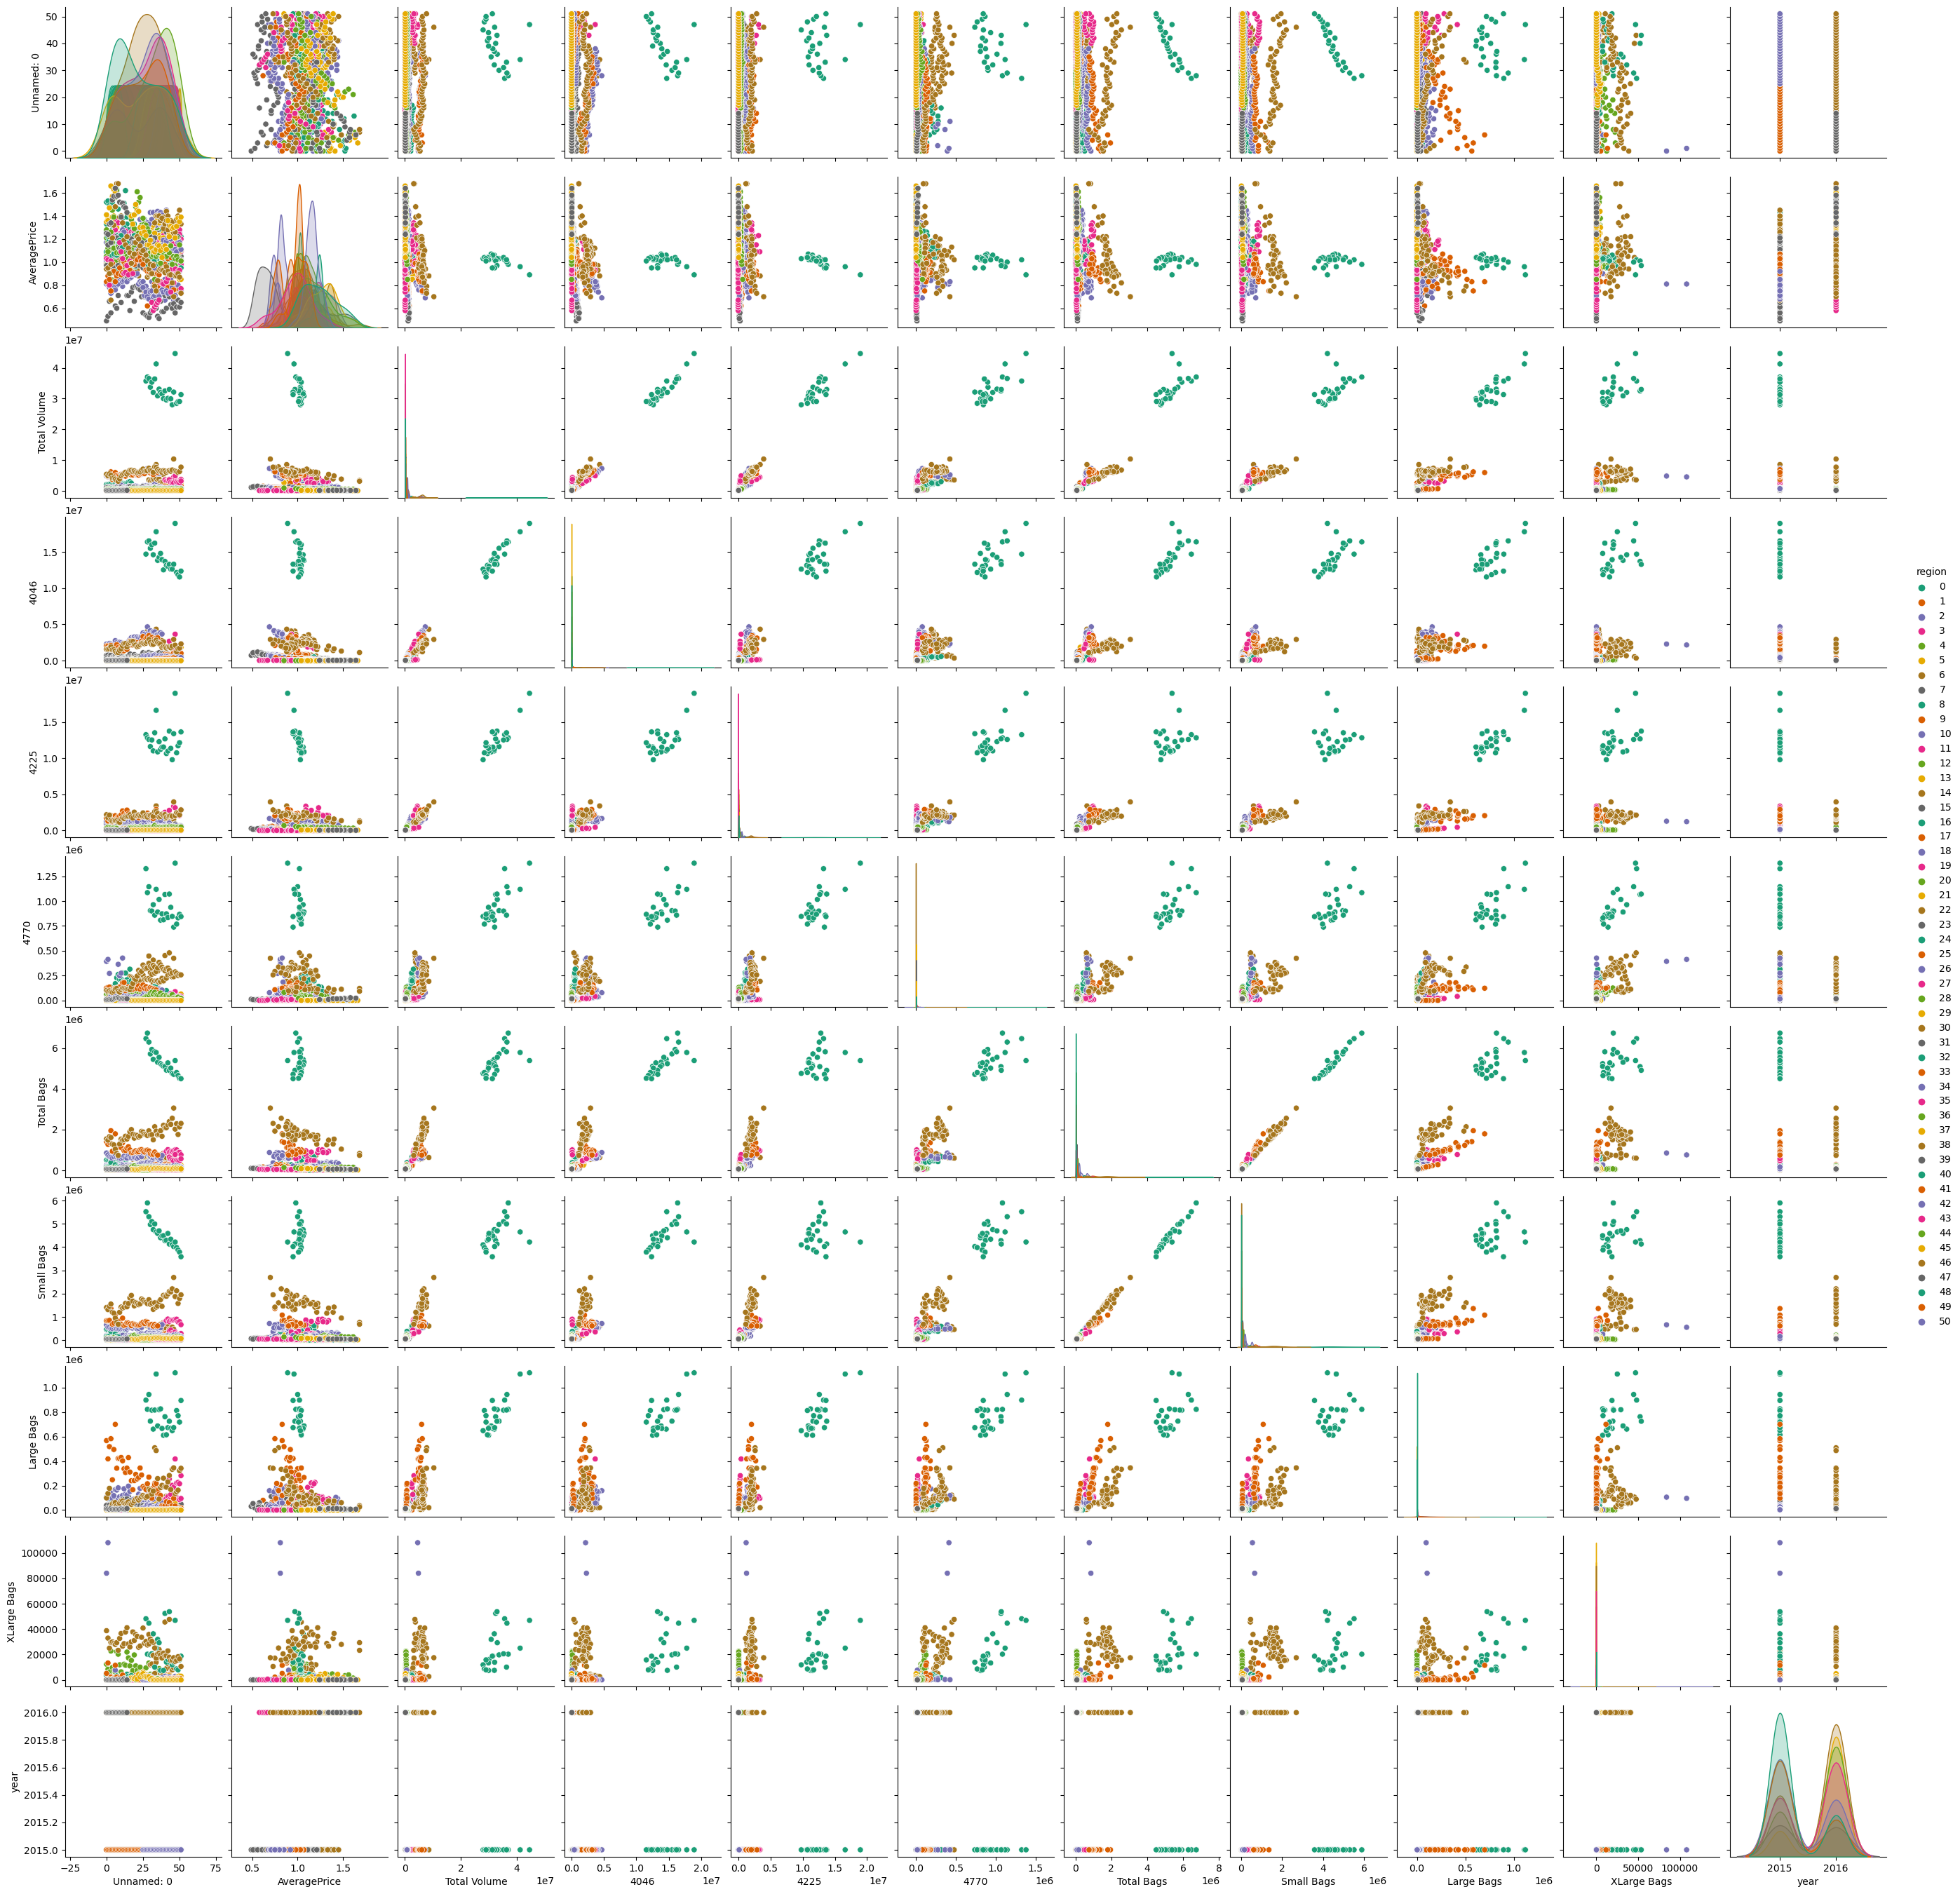

In [29]:
sns.pairplot(df,hue="region",palette="Dark2")
plt.show()

Observation- We can see the skweness in the given dataset and the relation between each columns 

Now, Plotting the Outliers

Unnamed: 0         AxesSubplot(0.125,0.712609;0.133621x0.167391)
AveragePrice    AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Total Volume     AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4046            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
4225            AxesSubplot(0.766379,0.712609;0.133621x0.167391)
4770               AxesSubplot(0.125,0.511739;0.133621x0.167391)
Total Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Small Bags       AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Large Bags      AxesSubplot(0.606034,0.511739;0.133621x0.167391)
XLarge Bags     AxesSubplot(0.766379,0.511739;0.133621x0.167391)
year                AxesSubplot(0.125,0.31087;0.133621x0.167391)
region           AxesSubplot(0.285345,0.31087;0.133621x0.167391)
dtype: object

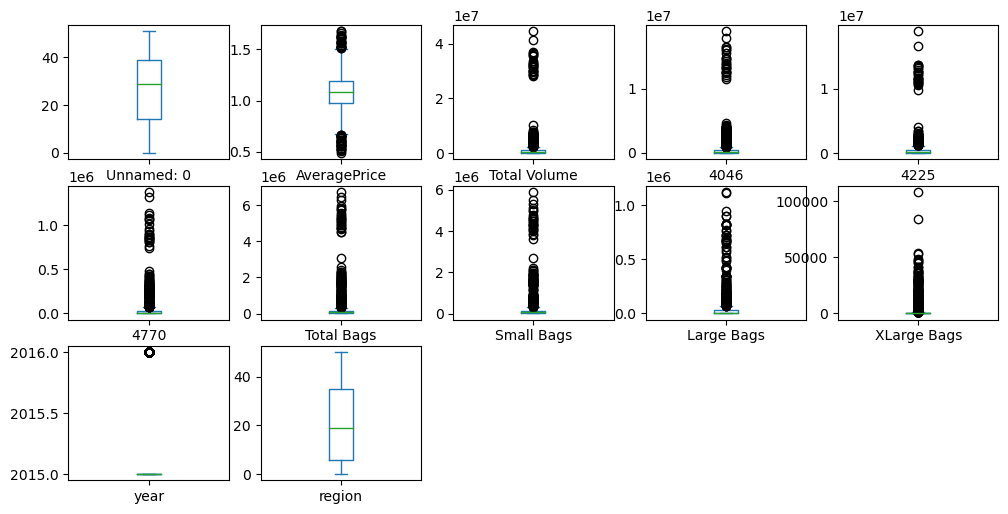

In [30]:
df.plot(kind="box",subplots=True,layout=(4,5),figsize=(12,8))

Observation- As we can see almost all the columns have outliers as we already mentioned in earliy dignosis. We will remove outliers from each columns

Removing the outliers

In [31]:
from scipy.stats import zscore
out_features=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]
z=np.abs(zscore(out_features))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.350481,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727,0.441008
1,1.456397,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727,0.441008
2,0.767838,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727,0.441008
3,0.026531,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727,0.441008
4,1.085691,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727,0.441008
...,...,...,...,...,...,...,...,...,...,...
1512,1.668229,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489,2.267532
1513,2.303724,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727,2.267532
1514,2.144850,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037,2.267532
1515,2.091892,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727,2.267532


In [32]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


In [34]:
df_new.shape

(1436, 13)

In [35]:
df.shape

(1517, 13)

Observation - The Row size is reduced 1436 to  from 1517, and with the help od zscore we have removed the outliers succefully from the given dataset

In [36]:
df=df_new
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


Now, Checking the Skewness and removing it, as seen in the pairplot there is skewness in the given dataset, Lets find it out

Checking the skewness one by one with the help of distplot so as to get the clear picture of skewness in each columns

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

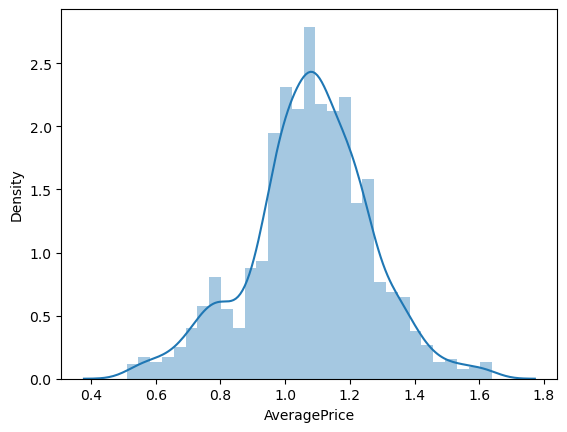

In [37]:
sns.distplot(df['AveragePrice'])

Observation -No Skewness

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

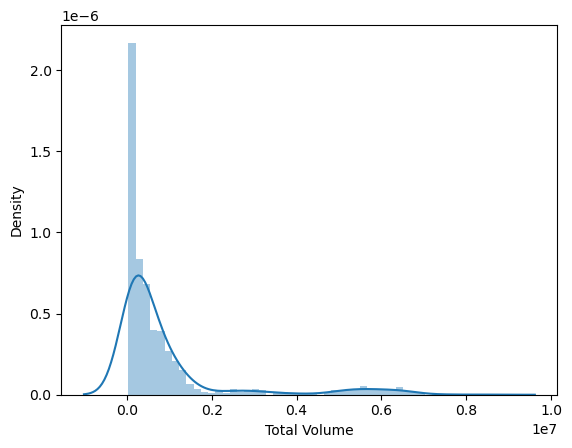

In [38]:
sns.distplot(df['Total Volume'])

Observation- There is the skewness in the column

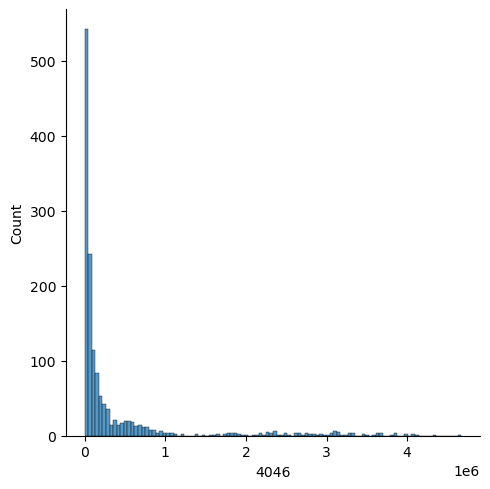

In [39]:
sns.displot(df['4046'])

Observation- Skewness is present in the given column

<AxesSubplot:xlabel='4225', ylabel='Density'>

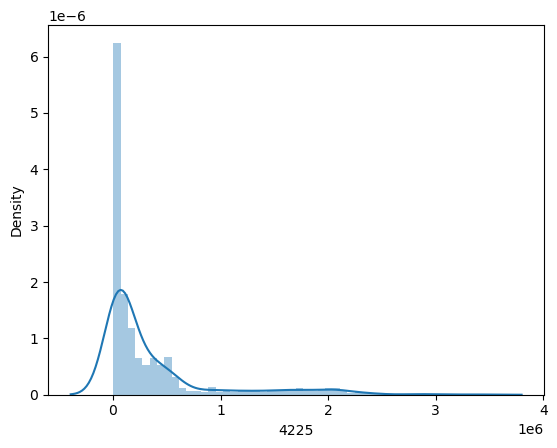

In [40]:
sns.distplot(df['4225'])

Observation - There is the skewness present in the column

<AxesSubplot:xlabel='4770', ylabel='Density'>

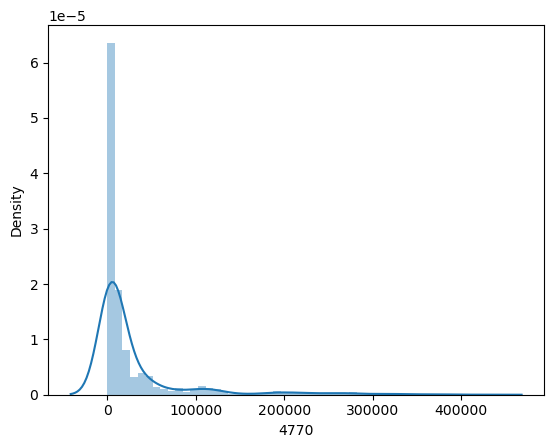

In [41]:
sns.distplot(df['4770'])

Observation- Skewness is present in the given column

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

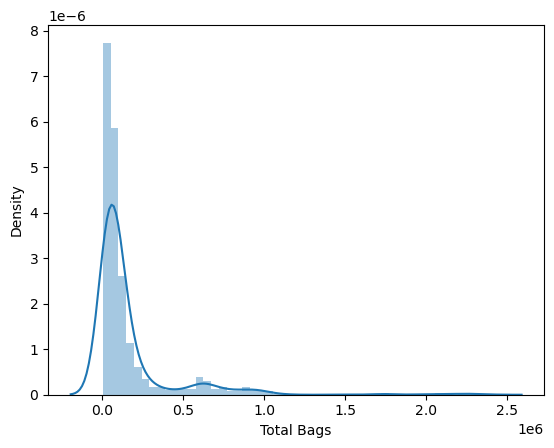

In [42]:
sns.distplot(df['Total Bags'])

Observation - Skewness is present in the given column

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

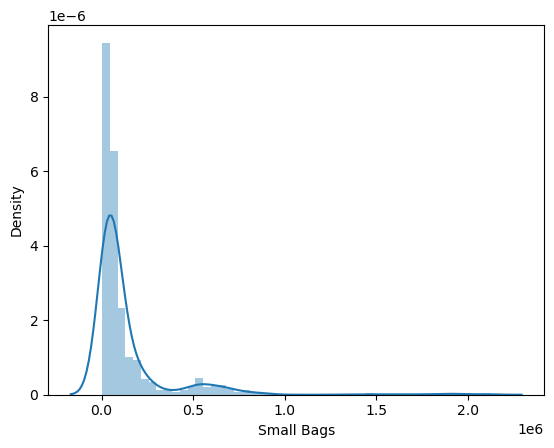

In [43]:
sns.distplot(df['Small Bags'])

Observation- There is the skewness present in the given column

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

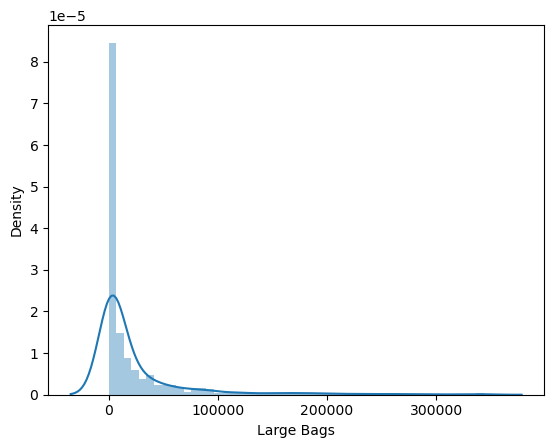

In [44]:
sns.distplot(df['Large Bags'])

Observation- There is the skewness present in the given column

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

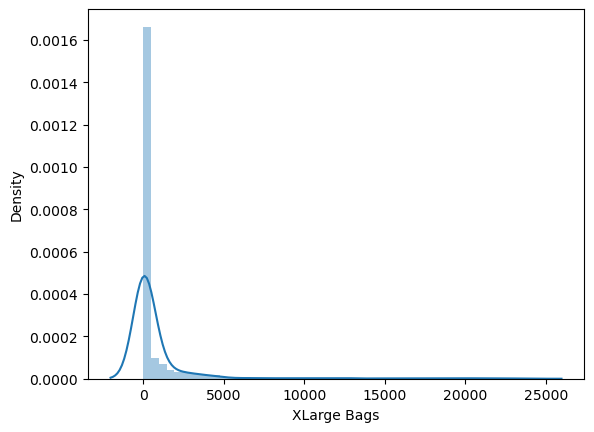

In [45]:
sns.distplot(df['XLarge Bags'])

Observation - Skewness is present in the column

sns.distplot(df['year'])

Observation- Skewness is present in the given column

In [46]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

Observation- The skewness must fall in range of -0.5 to +0.5, hence removing the skewness in the column of XLarge Bags as it is having highest number skewness

In [47]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [48]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

still the skewness is high in some columns, hence removing the skewness 

In [49]:
df['Small Bags']=np.cbrt(df['Small Bags'])

In [50]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      1.559423
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [51]:
df['Total Bags']=np.cbrt(df['Total Bags'])

In [52]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      1.569990
Small Bags      1.559423
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [53]:
df['4770']=np.cbrt(df['4770'])

In [54]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [55]:
df['4046']=np.cbrt(df['4046'])

In [56]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            1.241668
4225            2.367429
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [57]:
df['Total Volume']=np.cbrt(df['Total Volume'])

In [58]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    1.360283
4046            1.241668
4225            2.367429
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [59]:
df['4225']=np.cbrt(df['4225'])

In [60]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    1.360283
4046            1.241668
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      3.518056
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [61]:
df['Large Bags']=np.cbrt(df['Large Bags'])

In [62]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    1.360283
4046            1.241668
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

In [63]:
df['Total Volume']=np.cbrt(df['Total Volume'])
df['4046']=np.cbrt(df['4046'])
df['4770']=np.cbrt(df['4770'])
df['Total Bags']=np.cbrt(df['Total Bags'])
df['Small Bags']=np.cbrt(df['Small Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df['year']=np.cbrt(df['year'])

In [64]:
df.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    0.757213
4046            0.231052
4225            0.980401
4770            0.021209
Total Bags      0.777719
Small Bags      0.787978
Large Bags      0.933361
XLarge Bags     0.552869
year            2.004439
region          0.276276
dtype: float64

In [65]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Unnamed: 0,1.000000,-0.073550,0.119952,0.130320,0.058094,0.022303,0.118140,0.126446,0.063323,-0.098151,0.025650,-0.003786
AveragePrice,-0.073550,1.000000,-0.349323,-0.558452,-0.130102,-0.266978,-0.190662,-0.145293,-0.266420,-0.071997,0.173229,-0.212618
Total Volume,0.119952,-0.349323,1.000000,0.754932,0.903820,0.601710,0.923541,0.905311,0.686531,0.288092,-0.077028,0.162519
4046,0.130320,-0.558452,0.754932,1.000000,0.458794,0.525767,0.611356,0.566021,0.601246,0.210646,-0.206437,0.316061
4225,0.058094,-0.130102,0.903820,0.458794,1.000000,0.551374,0.865802,0.873785,0.577867,0.289116,-0.024204,0.073025
4770,0.022303,-0.266978,0.601710,0.525767,0.551374,1.000000,0.545157,0.565987,0.310789,0.508162,-0.038225,0.000720
Total Bags,0.118140,-0.190662,0.923541,0.611356,0.865802,0.545157,1.000000,0.982174,0.704678,0.347011,0.067976,0.117723
Small Bags,0.126446,-0.145293,0.905311,0.566021,0.873785,0.565987,0.982174,1.000000,0.585124,0.339027,0.099043,0.101481
Large Bags,0.063323,-0.266420,0.686531,0.601246,0.577867,0.310789,0.704678,0.585124,1.000000,0.198116,-0.131450,0.182796
XLarge Bags,-0.098151,-0.071997,0.288092,0.210646,0.289116,0.508162,0.347011,0.339027,0.198116,1.000000,0.104819,-0.206144


Spliting the data into x & y so as to fit it in the model

In [66]:
x=df.drop("region",axis=1)
y=df["region"]

In [67]:
x

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,27-12-2015,1.33,3.421355,2.163089,37.903460,1.538031,2.739725,2.736445,4.534711,0.000000,12.630630
1,1.0,20-12-2015,1.35,3.362009,2.062128,35.473513,1.571123,2.766926,2.763758,4.602425,0.000000,12.630630
2,2.0,13-12-2015,0.93,3.661276,2.100123,47.790416,1.718177,2.719854,2.716005,4.689671,0.000000,12.630630
3,3.0,06-12-2015,1.08,3.500870,2.184320,41.597133,1.609746,2.619699,2.612930,5.114173,0.000000,12.630630
4,4.0,29-11-2015,1.28,3.335038,2.140048,35.260208,1.617482,2.637860,2.628355,5.825433,0.000000,12.630630
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,3.861380,3.379686,38.341942,2.961667,3.391843,3.318630,21.796084,1.838756,12.632719
1513,11.0,09-10-2016,1.51,3.832162,3.274871,37.370423,2.995512,3.415780,3.360831,20.485264,0.000000,12.632719
1514,12.0,02-10-2016,1.48,3.832580,3.299631,37.537652,2.946438,3.410441,3.351363,20.212860,2.108873,12.632719
1515,13.0,25-09-2016,1.47,3.857510,3.356761,37.702567,2.960984,3.419546,3.367262,20.229246,0.000000,12.632719


In [68]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1436, dtype: int32

Feature Scaling using Standard Scalarization

In [69]:
x=x.drop(columns = ['Date'])

In [70]:
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,1.33,3.421355,2.163089,37.903460,1.538031,2.739725,2.736445,4.534711,0.000000,12.630630
1,1.0,1.35,3.362009,2.062128,35.473513,1.571123,2.766926,2.763758,4.602425,0.000000,12.630630
2,2.0,0.93,3.661276,2.100123,47.790416,1.718177,2.719854,2.716005,4.689671,0.000000,12.630630
3,3.0,1.08,3.500870,2.184320,41.597133,1.609746,2.619699,2.612930,5.114173,0.000000,12.630630
4,4.0,1.28,3.335038,2.140048,35.260208,1.617482,2.637860,2.628355,5.825433,0.000000,12.630630
...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,1.39,3.861380,3.379686,38.341942,2.961667,3.391843,3.318630,21.796084,1.838756,12.632719
1513,11.0,1.51,3.832162,3.274871,37.370423,2.995512,3.415780,3.360831,20.485264,0.000000,12.632719
1514,12.0,1.48,3.832580,3.299631,37.537652,2.946438,3.410441,3.351363,20.212860,2.108873,12.632719
1515,13.0,1.47,3.857510,3.356761,37.702567,2.960984,3.419546,3.367262,20.229246,0.000000,12.632719


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()

In [73]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [74]:
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.842069,1.344989,-1.294045,-1.607428,-0.620765,-1.596532,-1.625624,-1.487522,-0.973673,-0.844520,-0.413870
1,-1.774343,1.451388,-1.391132,-1.729093,-0.702076,-1.547474,-1.568011,-1.429389,-0.969220,-0.844520,-0.413870
2,-1.706618,-0.782987,-0.901544,-1.683306,-0.289925,-1.329471,-1.667714,-1.531027,-0.963482,-0.844520,-0.413870
3,-1.638893,0.015004,-1.163961,-1.581843,-0.497166,-1.490216,-1.879851,-1.750413,-0.935562,-0.844520,-0.413870
4,-1.571168,1.078992,-1.435256,-1.635194,-0.709214,-1.478748,-1.841384,-1.717582,-0.888782,-0.844520,-0.413870
...,...,...,...,...,...,...,...,...,...,...,...
1431,-1.164817,1.664186,-0.574180,-0.141343,-0.606092,0.513970,-0.244377,-0.248401,0.161610,0.977695,2.416215
1432,-1.097091,2.302579,-0.621980,-0.267653,-0.638601,0.564145,-0.193676,-0.158580,0.075397,-0.844520,2.416215
1433,-1.029366,2.142980,-0.621296,-0.237816,-0.633005,0.491394,-0.204985,-0.178733,0.057481,1.245381,2.416215
1434,-0.961641,2.089781,-0.580511,-0.168970,-0.627487,0.512958,-0.185698,-0.144892,0.058559,-0.844520,2.416215


We have Scale the data to overcome the issue of biasness

Now, Checking Variance Inflation Factor (VIF)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif=pd.DataFrame()
vif["vif value"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,vif value,Features
0,1.066068,Unnamed: 0
1,1.690257,AveragePrice
2,48.571333,Total Volume
3,8.747485,4046
4,18.923879,4225
5,2.252166,4770
6,130.041079,Total Bags
7,98.502167,Small Bags
8,6.722845,Large Bags
9,1.540754,XLarge Bags


By checking VIF values we can find the features causing multicollineraity problem.We can find that "Total Volume","Small Bags","Total Bags" is having the highest VIF, we will drop this column first respectively and check the vif again

In [77]:
x.drop("Total Bags", axis = 1, inplace= True)

In [78]:
vif=pd.DataFrame()
vif["vif value"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,vif value,Features
0,1.062314,Unnamed: 0
1,1.684018,AveragePrice
2,42.450549,Total Volume
3,8.025182,4046
4,16.771339,4225
5,2.205476,4770
6,8.768549,Small Bags
7,2.083414,Large Bags
8,1.451016,XLarge Bags
9,1.232828,year


In [79]:
x.drop("Total Volume", axis = 1, inplace= True)

In [80]:
vif=pd.DataFrame()
vif["vif value"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,vif value,Features
0,1.060166,Unnamed: 0
1,1.564552,AveragePrice
2,3.123245,4046
3,5.156018,4225
4,2.186713,4770
5,6.154437,Small Bags
6,2.046920,Large Bags
7,1.439354,XLarge Bags
8,1.231767,year


Hence the Multi-collinearity problem is resolved 

Putting it in the models to check the best fit.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [82]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("max r2_score is",maxAccu,"on Random_state",maxRS)
 

max r2_score is 0.38038123235807 on Random_state 91


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

Linear Regression Model

In [85]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score:-", r2_score(y_test,pred_LR))
print("R2_score on training data", r2_score(y_train,pred_train)*100)
print("Mean_Absolute_Error:-",mean_absolute_error(y_test,pred_LR))
print("Mean_Squared_Error:-", mean_squared_error(y_test,pred_LR))
print("Root_Mean_Square_Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:- 0.380815479818605
R2_score on training data 30.874540964455697
Mean_Absolute_Error:- 10.188506194294312
Mean_Squared_Error:- 155.84491151276097
Root_Mean_Square_Error:- 12.48378594468685


Observation- Accuracy 38.08%

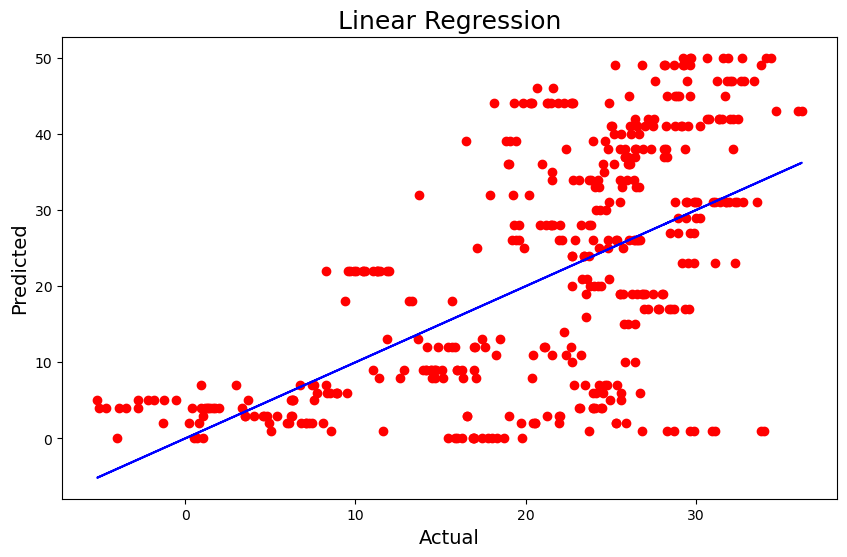

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Random Forest Regressor

In [87]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_RFR))
print('R2_score on training data:-', r2_score(y_train,pred_train)*100)
print('Mean_Absolute_Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean_Squared_Error:-',mean_squared_error(y_test,pred_RFR))
print('Root_Mean_Squared_Error:-',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:- 0.9152322681920741
R2_score on training data:- 98.57940315920834
Mean_Absolute_Error:- 2.4951508120649653
Mean_Squared_Error:- 21.33551345707657
Root_Mean_Squared_Error:- 4.619038152805903


Observation- Accuracy 90.61%

Gradient Boosting Regressor

In [88]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_GBR))
print('R2_score on training data:-',r2_score(y_train,pred_train)*100)
print('Mean_Absolute_Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean_Squared_Error:-',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:- 0.7925301439213662
R2_score on training data:- 87.29165974283072
Mean_Absolute_Error:- 5.330724348440157
Mean_Squared_Error:- 52.218878715940264
Root Mean Squared Error:- 7.226263122523305


Observation- Accuracy 79.25%

Lasso 

In [89]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:', r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_lasso))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_lasso))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.32737300311700157
R2_score on training data: 27.016061646557777
Mean Absolute Error :- 10.929522857947845
Mean_Squared_Error :-  169.29605213582465
Root Mean Square Error:- 13.011381638235989


Observation- Accuracy : 32.73%

Ridge

In [90]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:-', r2_score(y_test,pred_rd))
print('R2_score on training data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score:- 0.38074933128657806
R2_score on training data:- 30.874334422404516
Mean Absolute Error:- 10.190197334975633
Mean Squared Error:- 155.8615606888699
Root Mean Squared Error:- 12.484452758886546


observation- Accuracy :-38.07%

Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:-',r2_score(y_test,pred_dtr))
print('R2_score on training data:-',r2_score(y_train,pred_train)*100)
print('Mean_Absolute_Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean_Squared_Error:-',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score:- 0.8572640545394029
R2_score on training data:- 100.0
Mean_Absolute_Error:- 1.6334106728538282
Mean_Squared_Error:- 35.92575406032483
Root Mean Squared Error:- 5.993809644985802


Observation- Accuracy: 84.90%

SVR

In [92]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_Score:-',r2_score(y_test,pred_svr))
print('R2_Score on training data:-', r2_score(y_train,pred_train)*100)
print('Mean_Absolute_Error:-',mean_absolute_error(y_test,pred_svr))
print('Mean_Squared_Error:-',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:- 0.48712110732702263
R2_Score on training data:- 44.683027114183616
Mean_Absolute_Error:- 8.72938174192711
Mean_Squared_Error:- 129.08844300882552
Root Mean Squared Error:- 11.36170951084499


Observation- Accuracy: 48.71%

Extra Tree Regressor

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_etr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_etr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.9359615365056757
R2_score on training data: 100.0
Mean Absolute Error :- 2.040835266821346
Mean_Squared_Error :-  16.118084918793503
Root Mean Square Error:- 4.014733480418532


Observation- Accuracy: 93.72%

Cross- Validation Score

In [95]:
from sklearn.model_selection import cross_val_score

In [97]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_LR)- score.mean())*100)

[-60.93328769  -7.07072326  -4.94852715 -41.89978237   0.07699692]
-22.95506470753873
Difference between R2 score and cross validation is :-  2333.588018735734


In [98]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_RFR)- score.mean())*100)

[-79.51396371 -10.46337849 -14.28897981 -43.34854972   0.26559076]
-29.46985619456523
Difference between R2 score and cross validation is :-  2387.0296975730807


In [99]:
score2=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_svr)- score.mean())*100)

[-6.34659591e+01 -1.20311869e+01 -1.79879386e+01 -5.82640541e+01
 -6.30587648e-02]
-30.362439488836127
Difference between R2 score and cross validation is :-  2344.2185814865757


In [100]:
score3=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_etr)- score.mean())*100)

[-79.4847994  -10.5905581  -13.55668985 -46.24313894   0.30796409]
-29.91344444038038
Difference between R2 score and cross validation is :-  2389.1026244044406


In [101]:
score4=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_dtr)- score.mean())*100)

[-8.30938265e+01 -2.47049599e+01 -2.50798965e+01 -3.81708528e+01
 -1.94620582e-02]
-34.213799563456824
Difference between R2 score and cross validation is :-  2381.2328762078137


In [102]:
score5=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_GBR)- score.mean())*100)

[-77.7820575   -8.01188483 -13.06913443 -42.58853186   0.24404805]
-28.241512114760404
Difference between R2 score and cross validation is :-  2374.75948514601


Conclusion- We can use ExtraTreeRegressor or  Random Forest Regressor Algos, as the accuracy of both the algos is higher

Now, Doing it with Logistic Regression

In [103]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 1.0 at random_state 155


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [107]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [108]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

1.0
[[23  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         8
          14       1.00      

Observation- Accuracy:100%

In [109]:
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9280742459396751
[[22  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.93      1.00      0.96        13
           2       0.90      0.86      0.88        22
           3       0.96      0.93      0.94        27
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        12
           7       1.00      0.89      0.94         9
           8       0.88      0.88      0.88         8
           9       0.93      1.00      0.96        13
          10       0.75      0.60      0.67         5
          11       0.75      1.00      0.86         6
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         8
          14  

Observation- Accuracy :92.80%

In [110]:
svc= SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9164733178654292
[[21  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        22
           3       1.00      0.85      0.92        27
           4       1.00      1.00      1.00        21
           5       1.00      0.87      0.93        15
           6       1.00      1.00      1.00        12
           7       1.00      0.78      0.88         9
           8       1.00      1.00      1.00         8
           9       0.87      1.00      0.93        13
          10       1.00      0.80      0.89         5
          11       0.75      1.00      0.86         6
          12       1.00      1.00      1.00        17
          13       0.89      1.00      0.94         8
          14  

Observation- Accuracy: 91.64%

In [111]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9048723897911833
[[22  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.76      1.00      0.87        13
           2       0.91      0.91      0.91        22
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        21
           5       0.94      1.00      0.97        15
           6       1.00      0.92      0.96        12
           7       0.69      1.00      0.82         9
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        13
          10       0.83      1.00      0.91         5
          11       0.83      0.83      0.83         6
          12       0.93      0.82      0.87        17
          13       0.86      0.75      0.80         8
          14  

Observation- Accuracy:90%

Conclusion- Hence we will select Random Forest Classifier as our model in Logistic Regression as it is having highest accuracy score

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.875      0.96864111 0.96515679 0.97909408 0.93379791]
0.9443379790940767
The difference between accuracy score and cross validation score is -  0.055662020905923315


In [114]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)- score.mean())

[0.76041667 0.90243902 0.93728223 0.91986063 0.80487805]
0.864975319396051
The difference between accuracy score and cross validation score is -  0.06309892654362415


In [115]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.79861111 0.89547038 0.94425087 0.90940767 0.85017422]
0.8795828493999226
The difference between accuracy score and cross validation score is -  0.1204171506000774


In [116]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.72222222 0.87804878 0.8815331  0.90243902 0.7630662 ]
0.8294618660472318
The difference between accuracy score and cross validation score is -  0.17053813395276818


In [ ]:
Conclusion- Hence the project is done by both Linear and Logistic Regression, and the findings of the project are as follows:
1) First we import the important libraries
2)Then we have performed Data Cleaning and Wrangling
3)Then we have done Feature Engineering on the given Dataset
4)We have also done Data Pre-Processing
5)We have done Feature Selection
6)We have splite the data into training and testing
7)Then we selected the model
8)We started model validation
9)Then we interpreted the results